In [ ]:
#default_exp Callbacks.SaveModel

In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# SaveModel
> Learning to use the savemodel callback in fastaiv2

# Setup
Quickly setting up our fastai dataloader that we will use for training.

In [ ]:
#export
from fastai2.data.all import *
from fastai2.vision.all import *
from nbdev.showdoc import *

In [ ]:
#exports
path = untar_data(URLs.PETS)
path_anno, path_img = [path/folder for folder in path.ls()]

In [ ]:
#exports
pat = r'/(\w+)_\d+.jpg'

dblock = DataBlock((ImageBlock,CategoryBlock),
                    splitter=RandomSplitter(),
                    get_items=get_image_files,
                    item_tfms=Resize(224),
                    batch_tfms=aug_transforms(),
                    get_y=RegexLabeller(pat))

In [ ]:
#exports
dls = dblock.dataloaders(path_img, bs=32)

# SaveModel

To setup the savemodel callback all we have to do is import the class from callback.tracker. As we can see below in the documentation, we can set various parameters before adding it to our training.

In [ ]:
from fastai2.callback.tracker import SaveModelCallback

In [ ]:
#show_doc(SaveModelCallback)

Before trying to use the callback, lets first explain the class parameters.

## Model compairison

* monitor: From the description above, this callback saves the "best" model during testing, but clearly this is a very fuzzy definition. Because of that we have the "monitor" variable, which tells us what we are compairing when choosing which model is better than the other.
* comp: Unlike monitor, "comp" defines HOW we compair the two models, instead of WHAT. By default it switches between np.greater and np.less functions depending on what we are monitoring. If you are changing monitor, it would be better to directly set comp as well.
* min_delta: Float value which gives us a delta for changing the "best" model. That way, we can get a newer model even if it's a tiny bit worse, in the value we are monitoring. This could be good when observing error or accuracy, so even if the error goes up, we still get the model with a better loss value which generalizes better.

## Saving Model

* fname: Name of the new model file. Should be changed constaintly and the changes should have parameters in the name to allow for easier model management.
* every_epoch: If set to True it will save every model trained and then load the best model at the end of training. If set to False it will only save the models that improve on the last best.
* add_save: TODO
* with_opt: add optimizer state (gradients?) to the saved model. This would be ideal if you plan on training after reloading the model. Is not necessary if these are the final parameters.

Now that we understand how these work, we can test different combinations.

# Monitor

In [ ]:
cbs = (SaveModelCallback(monitor="valid_loss", fname="valid_loss_save", every_epoch=True, with_opt=True))

epoch,train_loss,valid_loss,error_rate,time
0,1.539770,2.072352,0.559540,01:28
1,1.021325,1.272479,0.374831,01:35
2,0.604879,0.494665,0.151556,01:35
3,0.273988,0.326549,0.109608,01:35


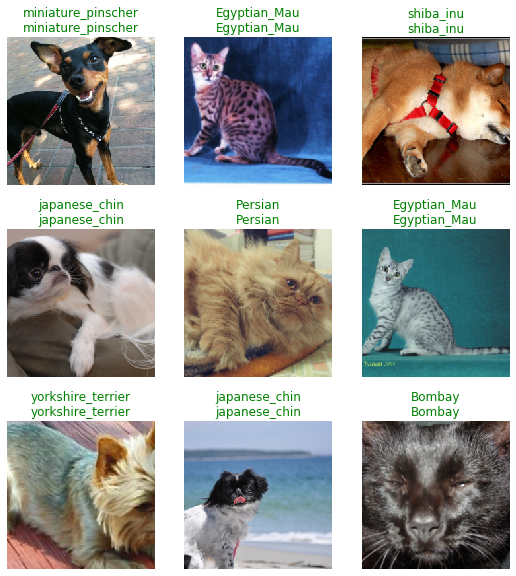

In [ ]:
#show
learner = Learner(dls, resnet34(pretrained=True), metrics=error_rate)
learner.fit_one_cycle(4, cbs=cbs)
learner.show_results()

In [ ]:
cbs = (SaveModelCallback(monitor="valid_loss_fp16", fname="valid_loss_save", every_epoch=True, with_opt=True))

epoch,train_loss,valid_loss,error_rate,time
0,1.593706,1.853973,0.529093,01:24
1,1.101173,1.871519,0.470230,01:23
2,0.575760,0.628871,0.202977,01:23
3,0.279056,0.313387,0.094046,01:23


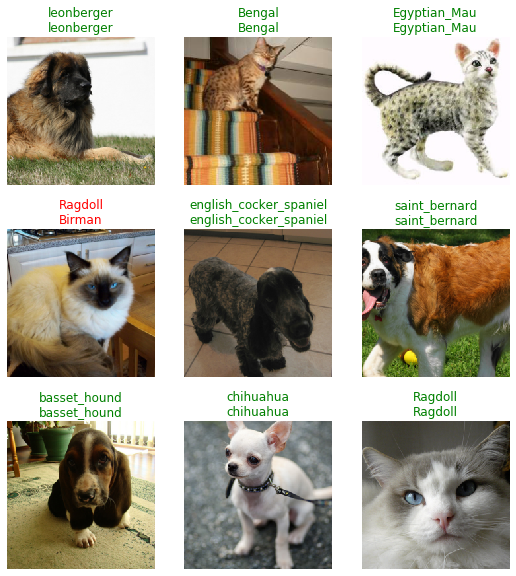

In [ ]:
#show
learner = Learner(dls, resnet34(pretrained=True), metrics=error_rate).to_fp16()
learner.fit_one_cycle(4, cbs=cbs)
learner.show_results()

In [ ]:
cbs = (SaveModelCallback(monitor="error", fname="error_save", every_epoch=True, with_opt=True))

In [ ]:
#show
learner = Learner(dls, resnet34(pretrained=True), metrics=error_rate).to_fp32()
learner.fit_one_cycle(4, cbs=cbs)
learner.show_results()